In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk


import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud


import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)

In [3]:

chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)


In [4]:
chunk_list

[                 _id     product  \
 0      R5U4GZKVIS0NK  B07DMJPV31   
 1      RSJ27FXLJ5Z7B  B07DMJPV31   
 2     R1JAIU95UEJC3Z  B07DMJPV31   
 3      RQJ5C2HTKCDWT  B07DMJPV31   
 4     R3SBWLGWQPO8W3  B07DMJPV31   
 ...              ...         ...   
 9995  R2R4BCVMVM0CPI  B00M1ROL28   
 9996  R3HN77X1W4CXWZ  B00M1ROL28   
 9997  R1Q0YMEH6UTW13  B00M1ROL28   
 9998  R2JQC2CR89VQ0Q  B00M1ROL28   
 9999   R6MAZTKM1JAUS  B00M1ROL28   
 
                                                   title  \
 0                                           Senza senso   
 1     Sconsiglio caldamente l'acquisto di questo gioco!   
 2     Penoso, irreale,la difesa ancora peggio degli ...   
 3                   Stesso gioco stesso MINESTRONE!!!!!   
 4                                                Ci sta   
 ...                                                 ...   
 9995                                    Ottimo prodotto   
 9996                                  bellissimo gioco!   
 9997         

In [5]:
dataReviews = pd.concat(chunk_list)

In [6]:
dataReviews

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,{'$numberInt': '1'},{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,{'$numberInt': '1'},{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,{'$numberInt': '1'},{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,{'$numberInt': '2'},{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,{'$numberInt': '5'},{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci..."
...,...,...,...,...,...,...,...,...,...,...
1988849,ROX7KFP6ENAHN,B07PYG9BB4,Soddisfatto,AFGRWOK6BLBCZ3MOEWMBQBKMLGYQ,sandro stefanutto,2019-04-13,{'$numberInt': '5'},{'$numberInt': '0'},False,"Arrivati in tempi standard, la confezione è mo..."
1988850,R2DSTT7NTDPW7L,B07PYG9BB4,Auricolari Bluetooth 5.0,AFMREQJ4U5ZGRJJFOMEAK24K3HIQ,Cristiana Di Ferdinando,2019-04-13,{'$numberInt': '5'},{'$numberInt': '0'},False,È un po 'più grande delle dimensioni originali...
1988851,RI2KLESBFR1W,B07PYG9BB4,Belle e comode,AGAXWSORWVOVIKKTKO647RXMTDKQ,Cliente Amazon,2019-04-13,{'$numberInt': '5'},{'$numberInt': '0'},False,"È una taglia più grande dell'originale, ma si ..."
1988852,R2FBVAZTZ0H5WF,B07PYG9BB4,Altissima Qualità,AFGRWOK6BLBCZ3MOEWMBQBKMLGYQ,sandro stefanutto,2019-04-13,{'$numberInt': '5'},{'$numberInt': '0'},False,Ho comprato queste cuffie per mio padre che da...


### Exploratory Data Analysis

In [7]:
print("Number of reviews:", len(dataReviews))

Number of reviews: 1988854


In [8]:
def convert_rating(rating):
    return rating["$numberInt"]

In [9]:
dataReviews["rating"]=dataReviews["rating"].apply(convert_rating).astype(int)

In [10]:
counts = dataReviews["rating"].value_counts()

In [11]:
counts.values

array([1352903,  358883,  116247,  100461,   60360], dtype=int64)

In [12]:
x = counts._index
print(x)
y = counts.values
print(y)

Int64Index([5, 4, 3, 1, 2], dtype='int64')
[1352903  358883  116247  100461   60360]


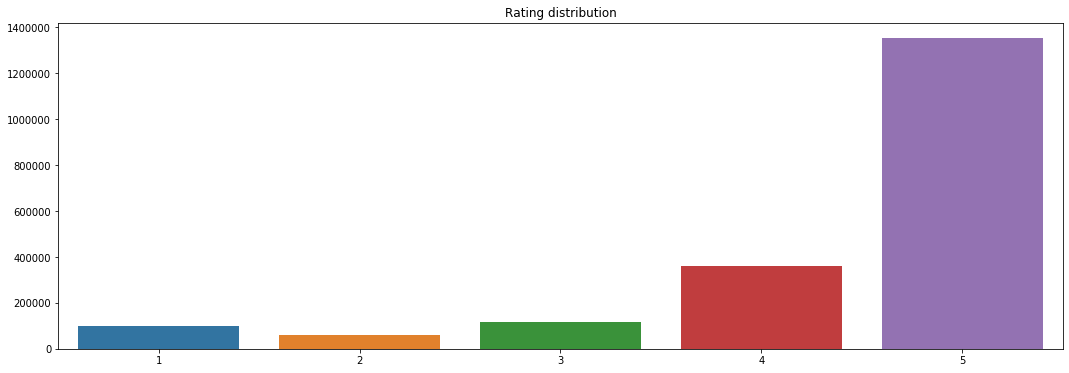

In [13]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [14]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

Proportion of review with score=1: 5.051200339491989%
Proportion of review with score=2: 3.0349135733442476%
Proportion of review with score=3: 5.844923760115122%
Proportion of review with score=4: 18.044713186588858%
Proportion of review with score=5: 68.02424914045979%


In [15]:
from afinn import Afinn

In [16]:
afinn = Afinn()
#dataReviews['afinn'] = dataReviews["body"].apply(afinn.score)

In [17]:
sub_data=dataReviews[:10000]
sub_data['afinn'] = sub_data["body"].apply(afinn.score)
sub_data

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0


In [18]:
def afinn_to_rating(score_afinn):
    if(score_afinn >= 4 ):
        return 5
    elif (score_afinn>=2 and score_afinn<= 3):
        return 4
    elif (score_afinn >=-1 and score_afinn <= 1):
        return 3
    elif (score_afinn >=-3 and score_afinn <=-2):
        return 2
    else:
        return 1

In [19]:
sub_data["new_afinn"] = sub_data["afinn"].apply(afinn_to_rating)
sub_data

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3


In [20]:
sub_data

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(sub_data["rating"], sub_data["new_afinn"])

0.0727

In [22]:
sub_data["rating"]

0       1
1       1
2       1
3       2
4       5
       ..
9995    5
9996    5
9997    4
9998    5
9999    3
Name: rating, Length: 10000, dtype: int32

In [23]:
sub_data["new_afinn"]

0       3
1       1
2       4
3       1
4       3
       ..
9995    3
9996    3
9997    3
9998    3
9999    3
Name: new_afinn, Length: 10000, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(sub_data["rating"], sub_data["new_afinn"])

array([[   6,   29,  354,   85,   27],
       [   2,    7,  118,   47,   17],
       [   2,   16,  242,   51,   25],
       [  16,   62,  792,  137,   63],
       [  76,  543, 5956,  992,  335]], dtype=int64)

In [25]:
sub_data["body"].iloc[2]

'La EA non sa proprio cosa sia un gioco di calcio,la difesa questo anno è ancora peggio degli altri anni,terzini che non marcano ne fanno la fase offensiva,centrali che corrono verso le fasce lasciando libero il campo per i cross,difesa davvero scandalosa anche peggio del 18 e non credevo fosse possibile,per non parlare poi del fut champions,uno dei pochi giochi che dopo averci giocato sei più arrabbiato che rilassato,giocatori con 88 di velocità che si fanno riprendere a campo aperto e giocatori con 92 di velocità che non li ripigli  nemmeno partendo prima te,tiri da fuori area tutti in porta o tutti fuori a partita ,nessuna via di mezzo,palle sui pali che sembrano radiocomandate,giocatori scarsi che sembrano fenomeni,rimpalli irreali,fisica del pallone fantascientifica .... Addio fifa,pes non mi piace ma almeno ho provato che cerca di simulare realmente una partita non ti spaccia un ping ping per un gioco di calcio.'

### Stemming

In [101]:
from nltk.stem.snowball import SnowballStemmer

In [102]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [25]:
sentix = pd.read_csv("../data/sentix.csv", sep="\t", header=None)
sentix.columns=["lemma", "POS", "synset_ID", "score_1", "score_2", "polarity", "intensity"] 

In [26]:
sentix

,lemma,POS,synset_ID,score_1,score_2,polarity,intensity
0,abile,a,1740,0.125,0.00,1.0,0.125
1,intelligente,a,1740,0.125,0.00,1.0,0.125
2,valente,a,1740,0.125,0.00,1.0,0.125
3,capace,a,1740,0.125,0.00,1.0,0.125
4,incapace,a,2098,0.000,0.75,-1.0,0.750
...,...,...,...,...,...,...,...
74604,imbronciarsi,v,2771020,0.000,0.25,-1.0,0.250
74605,rannuvolarsi,v,2771020,0.000,0.25,-1.0,0.250
74606,rasserenarsi,v,2771169,0.125,0.00,1.0,0.125
74607,rischiararsi,v,2771169,0.125,0.00,1.0,0.125


In [27]:
stemmer.stem("bello")

'bell'

In [28]:
sentix["lemma"] = sentix["lemma"].astype(str)

In [29]:
sentix["stemming"] = sentix["lemma"].apply(stemmer.stem)

In [30]:
sentix

,lemma,POS,synset_ID,score_1,score_2,polarity,intensity,stemming
0,abile,a,1740,0.125,0.00,1.0,0.125,abil
1,intelligente,a,1740,0.125,0.00,1.0,0.125,intelligent
2,valente,a,1740,0.125,0.00,1.0,0.125,valent
3,capace,a,1740,0.125,0.00,1.0,0.125,capac
4,incapace,a,2098,0.000,0.75,-1.0,0.750,incapac
...,...,...,...,...,...,...,...,...
74604,imbronciarsi,v,2771020,0.000,0.25,-1.0,0.250,imbronc
74605,rannuvolarsi,v,2771020,0.000,0.25,-1.0,0.250,rannuvol
74606,rasserenarsi,v,2771169,0.125,0.00,1.0,0.125,rasseren
74607,rischiararsi,v,2771169,0.125,0.00,1.0,0.125,rischiar


In [31]:
sub_data['token']=sub_data['body'].apply(word_tokenize)

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
sub_data

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v..."
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio..."
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc..."
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1,"[Aspettavo, questo, momento, !, !, !, !, Comun..."
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]"
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que..."
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3,"[Gioco, funzionale, senza, eccessivi, problemi..."
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3,"[Bel, gioco, ,, consegna, veloce]"


### Sentix for lexicon based sentiment analysis

In [33]:
sentix_agg = sentix.loc[sentix["POS"]=="a"]
sentix_agg

,lemma,POS,synset_ID,score_1,score_2,polarity,intensity,stemming
0,abile,a,1740,0.125,0.000,1.000000,0.125000,abil
1,intelligente,a,1740,0.125,0.000,1.000000,0.125000,intelligent
2,valente,a,1740,0.125,0.000,1.000000,0.125000,valent
3,capace,a,1740,0.125,0.000,1.000000,0.125000,capac
4,incapace,a,2098,0.000,0.750,-1.000000,0.750000,incapac
...,...,...,...,...,...,...,...,...
3366,faustiano,a,3134282,0.250,0.000,1.000000,0.250000,faust
3367,onomatopeico,a,3137397,0.375,0.125,0.590334,0.395285,onomatop
3368,ulcerativo,a,3142636,0.375,0.250,0.251332,0.450694,ulcer
3369,preconcetto,a,3152577,0.000,0.500,-1.000000,0.500000,preconcett


In [34]:
sentix_agg = sentix.loc[sentix["POS"]=="a"]

In [35]:
sub_data["stemming"]=[stemming_token(row["token"], stemmer) for _, row in sub_data.iterrows()]

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
sub_data

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit..."
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc..."
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d..."
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1,"[Aspettavo, questo, momento, !, !, !, !, Comun...","[aspett, quest, moment, !, !, !, !, comunqu, p..."
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]"
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti..."
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3,"[Gioco, funzionale, senza, eccessivi, problemi...","[gioc, funzional, senz, eccess, problem, di, g..."
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3,"[Bel, gioco, ,, consegna, veloce]","[bel, gioc, ,, consegn, veloc]"


In [78]:
import statistics 

def lexicon_based_score(sentence,df_sentix):
    sum_pol = 0
    count=0
    #print(sentence)
    for elem in sentence:
        polarity = df_sentix[df_sentix.stemming  == elem]["polarity"]
        if not(polarity.empty):
            count += 1
            #print(elem)
            #print(polarity)
            #print(sum_pol)
            #if len(polarity >1):
                #print(type(polarity.iloc[0]))
                #print("polarity",polarity.value_counts())
            sum_pol += statistics.mean(polarity*5)#.value_counts().index[0]
            #print(polarity)
            #print(statistics.mean(polarity))
            #else:
            #    sum_pol += polarity
    #print(sum_pol)
    #print("_________________________________________________________")
    if count != 0:
        return sum_pol/count
    return 0

In [47]:
sub_data["body"].iloc[1]

'Uno dei peggiori se non il peggior gioco Fifa degli ultimi anni, dovrebbe essere il gioco di calcio più realistico al mondo ma quello che ho visto nei tiri, nei passaggi o negli interventi della cpu è pura fantascienza, non ero rimasto soddisfatto nemmeno del precedente capitolo "Fifa 18" ma devo dire che ora come ora lo rimpiango in pieno. Risparmiate i vostri soldi, almeno fino a quando non introdurranno un fix per tutti quest bug.\nDopo un mese da quello che ho scritto sopra posso dire che la situazione è solo peggiorata, quello che si vede in questo videogioco non si vede nemmeno nel circo Orfei. Forse è arrivato veramente il momento di comprare Pes.'

In [64]:
pol = lexicon_based_score(sub_data["stemming"].iloc[1], sentix_agg)

In [65]:
pol

-1.3268042500583168

In [62]:
print(sub_data["stemming"].iloc[0])
pol = lexicon_based_score(sub_data["stemming"].iloc[0], sentix_agg)
print(pol)

['non', 'ho', 'mai', 'scritt', 'una', 'recension', 'in', 'vit', 'mia', 'ma', 'per', 'quest', 'gioc', 'sent', 'propr', 'il', 'bisogn', 'di', 'scriv', 'qualcos', '.', 'part', 'consigl', 'a', 'tutt', 'di', 'non', 'acquist', 'quest', 'gioc', 'perc', 'butt', 'i', 'vostr', 'i', 'sold', '.', 'son', 'arriv', 'a', 'quest', 'conclusion', 'semplic', 'perc', 'che', 'tu', 'sia', 'brav', 'o', 'men', 'non', 'import', ',', 'e', 'il', 'gioc', 'che', 'decid', 'per', 'te', ',', 'tra', '8/9', 'gol', 'a', 'part', 'o', 'error', 'assurd', 'fatt', 'dall', 'cpu', 'il', 'tuo', '“', 'gioc', '”', 'pass', 'in', 'second', 'pian', '.', 'orma', 'cred', 'che', 'la', 'ea', 'prefer', 'arricc', 'con', 'vend', 'di', 'gioc', 'e', 'fif', 'points', 'senz', 'pens', 'minim', 'al', 'gamplay', 'o', 'a', 'rend', 'il', 'prodott', 'giocabil', '.', 'gioc', 'a', 'fif', 'da', 'orma', '7-8', 'anni', 'e', 'cred', 'che', 'quest', 'sia', 'il', 'peggior', 'di', 'tutt', 'e', 'son', 'molt', 'delus', '.', 'dett', 'quest', 'augur', 'a', 'tutt'

In [55]:
print(sub_data["body"].iloc[2])
pol = lexicon_based_score(sub_data["stemming"].iloc[2], sentix_agg)
print(pol)

La EA non sa proprio cosa sia un gioco di calcio,la difesa questo anno è ancora peggio degli altri anni,terzini che non marcano ne fanno la fase offensiva,centrali che corrono verso le fasce lasciando libero il campo per i cross,difesa davvero scandalosa anche peggio del 18 e non credevo fosse possibile,per non parlare poi del fut champions,uno dei pochi giochi che dopo averci giocato sei più arrabbiato che rilassato,giocatori con 88 di velocità che si fanno riprendere a campo aperto e giocatori con 92 di velocità che non li ripigli  nemmeno partendo prima te,tiri da fuori area tutti in porta o tutti fuori a partita ,nessuna via di mezzo,palle sui pali che sembrano radiocomandate,giocatori scarsi che sembrano fenomeni,rimpalli irreali,fisica del pallone fantascientifica .... Addio fifa,pes non mi piace ma almeno ho provato che cerca di simulare realmente una partita non ti spaccia un ping ping per un gioco di calcio.
2348    1.000000
2636    0.688083
Name: polarity, dtype: float64
0.84

In [56]:
print(sub_data["body"].iloc[3])
pol = lexicon_based_score(sub_data["stemming"].iloc[3], sentix_agg)
print(pol)

Aspettavo questo momento!!!! Comunque partiamo dal presupposto che;(1)l’ho ridato in dietro perché  la mia copia aveva problemi(non la mia ps4 pro) e ringrazio Amazon(dopo tanto tempo)che mi ha rimborsato i soldi...e ne è valsa la pena..!!(2) do 2 stelle solo per fare numero però anche per l’ottima spedizione per il giorno dell’uscita....e la seconda stella la do a tutte le licenze che contiene fifa veramente fiore all’occhiello!!!!(3)che dire sul resto!!!????? Scrivo a fatica questa recensione ma lo devo fare non solo come recensore (serio)ma anche verso chi lo acquisterà...NON SPENDETE I SOLDI PER QUESTO GIOCO....meglio risparmiarli!!.perchè!!???(1) giocabilità ASSURDA..i giocatori non corrono pattinano(cit NHL) la Fisica della palla non rotola schizza e allo stesso tempo pattina anche lei,i calciatori non sono uguali alla realtà sembrano foto modelle....la velocità non congrua alla realtà...troppo troppo lenta..i passaggi allo stesso tempo sono lenti il movimento del passaggio ovver

In [67]:
print(sub_data["body"].iloc[4])
pol = lexicon_based_score(sub_data["stemming"].iloc[4], sentix_agg)
print(sub_data["rating"].iloc[4])
print(pol)

Regalato a mio figlio, commento nel titolo, ci gioca in modo continuativo ormai da giorni e ne sembra entusiasta. Ho richiesto un commento da poter trascrivere e la risposta è stata ”ci sta bellazi" che pare essere un complimentone da parte di un adolescente.
5
2.409665529398


In [69]:
print(sub_data["body"].iloc[-1])
print(sub_data["rating"].iloc[-1])

pol = lexicon_based_score(sub_data["stemming"].iloc[-1], sentix_agg)
print(pol)

Bel gioco nel suo genere.
3


ZeroDivisionError: division by zero

In [39]:
sub_data['lexicon_score']= sub_data["stemming"].progress_apply(lambda x: lexicon_based_score(x,sentix_agg))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [06:29<00:00, 25.70it/s]
C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
sub_data

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit...",0.021663
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc...",-0.051892
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d...",-0.024525
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1,"[Aspettavo, questo, momento, !, !, !, !, Comun...","[aspett, quest, moment, !, !, !, !, comunqu, p...",0.019041
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ...",0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]",0.204833
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti...",-0.026833
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3,"[Gioco, funzionale, senza, eccessivi, problemi...","[gioc, funzional, senz, eccess, problem, di, g...",0.022687
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3,"[Bel, gioco, ,, consegna, veloce]","[bel, gioc, ,, consegn, veloc]",0.000000


In [74]:
rating_5 = sub_data.loc[sub_data["rating"]==5]
rating_5

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ...",0.048193
6,R1FZ1DHL6RBBXQ,B07DMJPV31,Il solito giocone,AEJWOY4PGFFLEFUK6FDHR6H3BBKA,Virgilio,2018-10-20,5,{'$numberInt': '10'},True,Premetto di aver saltato Fifa 18 perché lo rit...,7.0,5,"[Premetto, di, aver, saltato, Fifa, 18, perché...","[premett, di, aver, salt, fif, 18, perc, lo, r...",0.024099
14,R29PMREVWIAZQZ,B07DMJPV31,Fifa 19 al suo meglio,AE62X2PKAWSDVNJTBWEHKLG3TTCA,Crevaz,2018-09-29,5,{'$numberInt': '3'},True,"Acquistato dopo pes 18, devo dire che ormai i ...",1.0,3,"[Acquistato, dopo, pes, 18, ,, devo, dire, che...","[acquist, dop, pes, 18, ,, dev, dir, che, orma...",0.066410
16,RRF65H70AKWLZ,B07DMJPV31,Giochi/tempo libero,AECEIYZKDNUCFMQHUFL4OXYS4T5Q,Dario,2018-10-21,5,{'$numberInt': '3'},True,Che dire....\nIl gioco è una bomba\nMa sono ri...,-3.0,2,"[Che, dire, ..., ., Il, gioco, è, una, bomba, ...","[che, dir, ..., ., il, gioc, è, una, bomb, ma,...",0.011874
19,R1CLPIBAUUZUZY,B07DMJPV31,Super acquisto,AGDDLS75HQ3ZWZ5C445ANWN4UEOQ,daniela,2018-10-09,5,{'$numberInt': '2'},True,Il giorno del lancio alle dieci di mattina era...,0.0,3,"[Il, giorno, del, lancio, alle, dieci, di, mat...","[il, giorn, del, lanc, alle, diec, di, mattin,...",0.041538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,R2OXC2Q2PWQGN7,B00M1ROL28,soddisfatto,AF3M2DVOEJE7RGHZZ2TBAOM3M33Q,Marcopolo,2018-11-20,5,{'$numberInt': '0'},True,consegna veloce e compatibile.,0.0,3,"[consegna, veloce, e, compatibile, .]","[consegn, veloc, e, compat, .]",0.200000
9994,R1MTXUFIAE7C1A,B00M1ROL28,Minecraft gioco per Ps4,AFDFWKVZJASWXSMVQRNLMNZGCYFA,Valerio Alessandro Bidoglio,2018-12-13,5,{'$numberInt': '0'},True,Arrivato nei tempi previsti,0.0,3,"[Arrivato, nei, tempi, previsti]","[arriv, nei, temp, previst]",0.000000
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]",0.204833
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti...",-0.026833


In [79]:
rating_5['lexicon_score']= rating_5["stemming"].progress_apply(lambda x: lexicon_based_score(x,sentix_agg))




  0%|                                                                                         | 0/7902 [00:00<?, ?it/s]

  0%|                                                                                 | 3/7902 [00:00<17:17,  7.61it/s]

  0%|                                                                                 | 4/7902 [00:00<18:15,  7.21it/s]

  0%|                                                                                 | 6/7902 [00:00<16:51,  7.81it/s]

  0%|                                                                                 | 7/7902 [00:00<16:25,  8.01it/s]

  0%|                                                                                 | 8/7902 [00:01<19:44,  6.66it/s]

  0%|                                                                                 | 9/7902 [00:01<18:45,  7.01it/s]

  0%|                                                                                | 10/7902 [00:01<17:34,  7.48it/s]

  0%|                         

  9%|███████                                                                        | 710/7902 [00:20<03:44, 31.99it/s]

  9%|███████▏                                                                       | 722/7902 [00:20<03:21, 35.70it/s]

  9%|███████▎                                                                       | 732/7902 [00:20<03:06, 38.52it/s]

  9%|███████▍                                                                       | 741/7902 [00:21<04:59, 23.93it/s]

  9%|███████▍                                                                       | 748/7902 [00:22<11:26, 10.43it/s]

 10%|███████▌                                                                       | 753/7902 [00:23<12:02,  9.89it/s]

 10%|███████▌                                                                       | 757/7902 [00:23<13:09,  9.05it/s]

 10%|███████▌                                                                       | 760/7902 [00:24<12:47,  9.30it/s]

 10%|███████▋                   

 14%|███████████▎                                                                  | 1142/7902 [00:45<15:13,  7.40it/s]

 14%|███████████▎                                                                  | 1143/7902 [00:45<20:49,  5.41it/s]

 14%|███████████▎                                                                  | 1144/7902 [00:45<18:17,  6.16it/s]

 15%|███████████▎                                                                  | 1146/7902 [00:46<15:47,  7.13it/s]

 15%|███████████▎                                                                  | 1148/7902 [00:46<13:12,  8.52it/s]

 15%|███████████▎                                                                  | 1150/7902 [00:46<11:26,  9.84it/s]

 15%|███████████▎                                                                  | 1152/7902 [00:46<10:36, 10.60it/s]

 15%|███████████▍                                                                  | 1154/7902 [00:46<09:54, 11.34it/s]

 15%|███████████▍               

 19%|██████████████▉                                                               | 1510/7902 [01:06<04:16, 24.95it/s]

 19%|██████████████▉                                                               | 1513/7902 [01:06<04:08, 25.68it/s]

 19%|██████████████▉                                                               | 1518/7902 [01:06<03:49, 27.84it/s]

 19%|███████████████                                                               | 1521/7902 [01:06<03:53, 27.38it/s]

 19%|███████████████                                                               | 1525/7902 [01:06<03:34, 29.76it/s]

 19%|███████████████                                                               | 1529/7902 [01:06<03:24, 31.17it/s]

 19%|███████████████▏                                                              | 1533/7902 [01:06<03:20, 31.79it/s]

 19%|███████████████▏                                                              | 1537/7902 [01:06<03:16, 32.40it/s]

 20%|███████████████▏           

 25%|███████████████████▋                                                          | 1993/7902 [01:30<04:19, 22.79it/s]

 25%|███████████████████▋                                                          | 1997/7902 [01:30<03:54, 25.18it/s]

 25%|███████████████████▋                                                          | 2000/7902 [01:31<03:50, 25.63it/s]

 25%|███████████████████▊                                                          | 2005/7902 [01:31<03:21, 29.31it/s]

 25%|███████████████████▊                                                          | 2009/7902 [01:31<03:13, 30.46it/s]

 26%|███████████████████▉                                                          | 2017/7902 [01:31<02:39, 36.79it/s]

 26%|███████████████████▉                                                          | 2022/7902 [01:31<02:32, 38.46it/s]

 26%|████████████████████                                                          | 2027/7902 [01:31<02:26, 40.12it/s]

 26%|████████████████████       

 34%|██████████████████████████▎                                                   | 2668/7902 [02:01<08:25, 10.35it/s]

 34%|██████████████████████████▍                                                   | 2674/7902 [02:03<10:35,  8.22it/s]

 34%|██████████████████████████▍                                                   | 2678/7902 [02:03<11:38,  7.47it/s]

 34%|██████████████████████████▍                                                   | 2681/7902 [02:04<11:26,  7.61it/s]

 34%|██████████████████████████▍                                                   | 2684/7902 [02:04<10:49,  8.04it/s]

 34%|██████████████████████████▌                                                   | 2686/7902 [02:04<09:19,  9.33it/s]

 34%|██████████████████████████▌                                                   | 2688/7902 [02:04<10:20,  8.40it/s]

 34%|██████████████████████████▌                                                   | 2690/7902 [02:05<09:38,  9.00it/s]

 34%|██████████████████████████▌

 39%|██████████████████████████████▏                                               | 3064/7902 [02:30<12:42,  6.35it/s]

 39%|██████████████████████████████▎                                               | 3066/7902 [02:30<11:17,  7.14it/s]

 39%|██████████████████████████████▎                                               | 3068/7902 [02:30<10:48,  7.45it/s]

 39%|██████████████████████████████▎                                               | 3070/7902 [02:30<08:58,  8.97it/s]

 39%|██████████████████████████████▎                                               | 3072/7902 [02:30<08:10,  9.84it/s]

 39%|██████████████████████████████▎                                               | 3074/7902 [02:30<07:17, 11.04it/s]

 39%|██████████████████████████████▎                                               | 3077/7902 [02:31<06:26, 12.49it/s]

 39%|██████████████████████████████▍                                               | 3079/7902 [02:31<06:46, 11.85it/s]

 39%|███████████████████████████

 44%|██████████████████████████████████▌                                           | 3505/7902 [02:58<05:39, 12.96it/s]

 44%|██████████████████████████████████▌                                           | 3507/7902 [02:58<08:23,  8.73it/s]

 44%|██████████████████████████████████▋                                           | 3509/7902 [02:59<13:06,  5.58it/s]

 44%|██████████████████████████████████▋                                           | 3511/7902 [02:59<11:53,  6.15it/s]

 44%|██████████████████████████████████▋                                           | 3513/7902 [03:00<11:41,  6.26it/s]

 44%|██████████████████████████████████▋                                           | 3514/7902 [03:00<11:48,  6.19it/s]

 44%|██████████████████████████████████▋                                           | 3516/7902 [03:00<11:12,  6.52it/s]

 45%|██████████████████████████████████▋                                           | 3517/7902 [03:00<11:49,  6.18it/s]

 45%|███████████████████████████

 50%|██████████████████████████████████████▌                                       | 3913/7902 [03:21<07:20,  9.06it/s]

 50%|██████████████████████████████████████▋                                       | 3915/7902 [03:21<07:50,  8.48it/s]

 50%|██████████████████████████████████████▋                                       | 3919/7902 [03:21<05:59, 11.07it/s]

 50%|██████████████████████████████████████▋                                       | 3922/7902 [03:21<06:19, 10.48it/s]

 50%|██████████████████████████████████████▋                                       | 3924/7902 [03:22<07:46,  8.53it/s]

 50%|██████████████████████████████████████▊                                       | 3926/7902 [03:22<09:00,  7.36it/s]

 50%|██████████████████████████████████████▊                                       | 3928/7902 [03:22<09:15,  7.15it/s]

 50%|██████████████████████████████████████▊                                       | 3929/7902 [03:23<08:59,  7.36it/s]

 50%|███████████████████████████

 55%|██████████████████████████████████████████▋                                  | 4378/7902 [03:46<00:32, 107.88it/s]

 56%|███████████████████████████████████████████▎                                  | 4391/7902 [03:47<01:15, 46.61it/s]

 56%|███████████████████████████████████████████▍                                  | 4401/7902 [03:48<02:46, 21.02it/s]

 56%|███████████████████████████████████████████▌                                  | 4408/7902 [03:49<04:03, 14.38it/s]

 56%|███████████████████████████████████████████▌                                  | 4414/7902 [03:49<04:13, 13.77it/s]

 56%|███████████████████████████████████████████▌                                  | 4418/7902 [03:50<04:10, 13.93it/s]

 56%|███████████████████████████████████████████▋                                  | 4422/7902 [03:50<03:59, 14.54it/s]

 56%|███████████████████████████████████████████▋                                  | 4425/7902 [03:50<04:19, 13.42it/s]

 56%|███████████████████████████

 60%|███████████████████████████████████████████████▏                              | 4779/7902 [04:13<03:23, 15.38it/s]

 61%|███████████████████████████████████████████████▏                              | 4781/7902 [04:13<03:28, 14.98it/s]

 61%|███████████████████████████████████████████████▏                              | 4783/7902 [04:13<03:17, 15.76it/s]

 61%|███████████████████████████████████████████████▏                              | 4785/7902 [04:14<03:08, 16.51it/s]

 61%|███████████████████████████████████████████████▎                              | 4787/7902 [04:14<03:11, 16.28it/s]

 61%|███████████████████████████████████████████████▎                              | 4790/7902 [04:14<02:55, 17.76it/s]

 61%|███████████████████████████████████████████████▎                              | 4792/7902 [04:14<03:06, 16.72it/s]

 61%|███████████████████████████████████████████████▎                              | 4795/7902 [04:14<02:55, 17.73it/s]

 61%|███████████████████████████

 67%|████████████████████████████████████████████████████▏                         | 5291/7902 [04:30<00:47, 55.00it/s]

 67%|████████████████████████████████████████████████████▎                         | 5297/7902 [04:31<00:47, 54.47it/s]

 67%|████████████████████████████████████████████████████▎                         | 5304/7902 [04:31<00:44, 58.11it/s]

 67%|████████████████████████████████████████████████████▍                         | 5311/7902 [04:31<00:51, 50.30it/s]

 67%|████████████████████████████████████████████████████▍                         | 5318/7902 [04:31<00:49, 52.43it/s]

 67%|████████████████████████████████████████████████████▌                         | 5324/7902 [04:31<00:51, 50.29it/s]

 67%|████████████████████████████████████████████████████▌                         | 5330/7902 [04:31<00:55, 46.17it/s]

 68%|████████████████████████████████████████████████████▋                         | 5335/7902 [04:31<00:54, 47.10it/s]

 68%|███████████████████████████

 75%|██████████████████████████████████████████████████████████▎                   | 5908/7902 [05:03<04:09,  8.00it/s]

 75%|██████████████████████████████████████████████████████████▎                   | 5910/7902 [05:03<03:37,  9.14it/s]

 75%|██████████████████████████████████████████████████████████▎                   | 5912/7902 [05:04<03:20,  9.93it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 5914/7902 [05:04<03:23,  9.77it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 5916/7902 [05:04<03:11, 10.39it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 5918/7902 [05:04<03:10, 10.40it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 5920/7902 [05:04<03:03, 10.83it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 5922/7902 [05:05<03:09, 10.47it/s]

 75%|███████████████████████████

 79%|█████████████████████████████████████████████████████████████▋                | 6247/7902 [05:26<00:29, 56.65it/s]

 79%|█████████████████████████████████████████████████████████████▋                | 6254/7902 [05:26<00:29, 55.47it/s]

 79%|█████████████████████████████████████████████████████████████▊                | 6267/7902 [05:26<00:24, 66.09it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 6275/7902 [05:27<00:36, 45.14it/s]

 79%|██████████████████████████████████████████████████████████████                | 6282/7902 [05:27<00:55, 29.38it/s]

 80%|██████████████████████████████████████████████████████████████                | 6287/7902 [05:27<01:02, 25.90it/s]

 80%|██████████████████████████████████████████████████████████████                | 6291/7902 [05:27<01:00, 26.82it/s]

 80%|██████████████████████████████████████████████████████████████▏               | 6295/7902 [05:28<00:56, 28.23it/s]

 80%|███████████████████████████

 86%|███████████████████████████████████████████████████████████████████           | 6789/7902 [05:59<02:52,  6.45it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6790/7902 [05:59<02:47,  6.66it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6791/7902 [05:59<02:37,  7.07it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6792/7902 [05:59<02:30,  7.39it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6793/7902 [05:59<02:58,  6.22it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6795/7902 [05:59<02:46,  6.65it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6796/7902 [06:00<02:43,  6.76it/s]

 86%|███████████████████████████████████████████████████████████████████           | 6797/7902 [06:00<03:11,  5.79it/s]

 86%|███████████████████████████

 91%|███████████████████████████████████████████████████████████████████████▎      | 7227/7902 [06:28<00:37, 18.16it/s]

 92%|███████████████████████████████████████████████████████████████████████▍      | 7237/7902 [06:28<00:28, 23.16it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 7244/7902 [06:29<00:31, 20.70it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 7250/7902 [06:29<00:34, 18.72it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 7255/7902 [06:29<00:31, 20.65it/s]

 92%|███████████████████████████████████████████████████████████████████████▋      | 7259/7902 [06:30<00:28, 22.56it/s]

 92%|███████████████████████████████████████████████████████████████████████▋      | 7264/7902 [06:30<00:24, 26.20it/s]

 92%|███████████████████████████████████████████████████████████████████████▊      | 7271/7902 [06:30<00:19, 32.25it/s]

 92%|███████████████████████████

 98%|████████████████████████████████████████████████████████████████████████████▍ | 7744/7902 [07:02<00:07, 21.82it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 7747/7902 [07:02<00:06, 22.78it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 7750/7902 [07:03<00:06, 23.82it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 7753/7902 [07:03<00:05, 25.38it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 7756/7902 [07:03<00:05, 26.59it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 7760/7902 [07:03<00:04, 29.32it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 7767/7902 [07:03<00:03, 34.92it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 7774/7902 [07:03<00:03, 41.05it/s]

 98%|███████████████████████████

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ...",2.409666
6,R1FZ1DHL6RBBXQ,B07DMJPV31,Il solito giocone,AEJWOY4PGFFLEFUK6FDHR6H3BBKA,Virgilio,2018-10-20,5,{'$numberInt': '10'},True,Premetto di aver saltato Fifa 18 perché lo rit...,7.0,5,"[Premetto, di, aver, saltato, Fifa, 18, perché...","[premett, di, aver, salt, fif, 18, perc, lo, r...",1.068978
14,R29PMREVWIAZQZ,B07DMJPV31,Fifa 19 al suo meglio,AE62X2PKAWSDVNJTBWEHKLG3TTCA,Crevaz,2018-09-29,5,{'$numberInt': '3'},True,"Acquistato dopo pes 18, devo dire che ormai i ...",1.0,3,"[Acquistato, dopo, pes, 18, ,, devo, dire, che...","[acquist, dop, pes, 18, ,, dev, dir, che, orma...",1.676123
16,RRF65H70AKWLZ,B07DMJPV31,Giochi/tempo libero,AECEIYZKDNUCFMQHUFL4OXYS4T5Q,Dario,2018-10-21,5,{'$numberInt': '3'},True,Che dire....\nIl gioco è una bomba\nMa sono ri...,-3.0,2,"[Che, dire, ..., ., Il, gioco, è, una, bomba, ...","[che, dir, ..., ., il, gioc, è, una, bomb, ma,...",0.587361
19,R1CLPIBAUUZUZY,B07DMJPV31,Super acquisto,AGDDLS75HQ3ZWZ5C445ANWN4UEOQ,daniela,2018-10-09,5,{'$numberInt': '2'},True,Il giorno del lancio alle dieci di mattina era...,0.0,3,"[Il, giorno, del, lancio, alle, dieci, di, mat...","[il, giorn, del, lanc, alle, diec, di, mattin,...",1.834303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,R2OXC2Q2PWQGN7,B00M1ROL28,soddisfatto,AF3M2DVOEJE7RGHZZ2TBAOM3M33Q,Marcopolo,2018-11-20,5,{'$numberInt': '0'},True,consegna veloce e compatibile.,0.0,3,"[consegna, veloce, e, compatibile, .]","[consegn, veloc, e, compat, .]",5.000000
9994,R1MTXUFIAE7C1A,B00M1ROL28,Minecraft gioco per Ps4,AFDFWKVZJASWXSMVQRNLMNZGCYFA,Valerio Alessandro Bidoglio,2018-12-13,5,{'$numberInt': '0'},True,Arrivato nei tempi previsti,0.0,3,"[Arrivato, nei, tempi, previsti]","[arriv, nei, temp, previst]",0.000000
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]",3.524164
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti...",0.032812


In [81]:
statistics.mean(rating_5["lexicon_score"])

1.9594000772426703

In [80]:
rating_5

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ...",2.409666
6,R1FZ1DHL6RBBXQ,B07DMJPV31,Il solito giocone,AEJWOY4PGFFLEFUK6FDHR6H3BBKA,Virgilio,2018-10-20,5,{'$numberInt': '10'},True,Premetto di aver saltato Fifa 18 perché lo rit...,7.0,5,"[Premetto, di, aver, saltato, Fifa, 18, perché...","[premett, di, aver, salt, fif, 18, perc, lo, r...",1.068978
14,R29PMREVWIAZQZ,B07DMJPV31,Fifa 19 al suo meglio,AE62X2PKAWSDVNJTBWEHKLG3TTCA,Crevaz,2018-09-29,5,{'$numberInt': '3'},True,"Acquistato dopo pes 18, devo dire che ormai i ...",1.0,3,"[Acquistato, dopo, pes, 18, ,, devo, dire, che...","[acquist, dop, pes, 18, ,, dev, dir, che, orma...",1.676123
16,RRF65H70AKWLZ,B07DMJPV31,Giochi/tempo libero,AECEIYZKDNUCFMQHUFL4OXYS4T5Q,Dario,2018-10-21,5,{'$numberInt': '3'},True,Che dire....\nIl gioco è una bomba\nMa sono ri...,-3.0,2,"[Che, dire, ..., ., Il, gioco, è, una, bomba, ...","[che, dir, ..., ., il, gioc, è, una, bomb, ma,...",0.587361
19,R1CLPIBAUUZUZY,B07DMJPV31,Super acquisto,AGDDLS75HQ3ZWZ5C445ANWN4UEOQ,daniela,2018-10-09,5,{'$numberInt': '2'},True,Il giorno del lancio alle dieci di mattina era...,0.0,3,"[Il, giorno, del, lancio, alle, dieci, di, mat...","[il, giorn, del, lanc, alle, diec, di, mattin,...",1.834303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,R2OXC2Q2PWQGN7,B00M1ROL28,soddisfatto,AF3M2DVOEJE7RGHZZ2TBAOM3M33Q,Marcopolo,2018-11-20,5,{'$numberInt': '0'},True,consegna veloce e compatibile.,0.0,3,"[consegna, veloce, e, compatibile, .]","[consegn, veloc, e, compat, .]",5.000000
9994,R1MTXUFIAE7C1A,B00M1ROL28,Minecraft gioco per Ps4,AFDFWKVZJASWXSMVQRNLMNZGCYFA,Valerio Alessandro Bidoglio,2018-12-13,5,{'$numberInt': '0'},True,Arrivato nei tempi previsti,0.0,3,"[Arrivato, nei, tempi, previsti]","[arriv, nei, temp, previst]",0.000000
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]",3.524164
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti...",0.032812


In [82]:
rating_1 = sub_data.loc[sub_data["rating"]==1]
rating_1

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit...",2.166258e-02
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc...",-5.189240e-02
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d...",-2.452518e-02
5,R368BZKBB3L13V,B07DMJPV31,Delusione totale,AE7YMXNEIPQ6B35KPYLKNB62FDFA,Beren,2018-11-28,1,{'$numberInt': '13'},True,"Davvero una grossa delusione, fifa 18 con l’ag...",2.0,4,"[Davvero, una, grossa, delusione, ,, fifa, 18,...","[davver, una, gross, delusion, ,, fif, 18, con...",7.112749e-03
11,RMYRFHL0E9ZZ,B07DMJPV31,Gioco già caro che induce ad ulteriori acquisti,AGWY2QL6HFXDTKQ2KPAFZFB6C7DQ,Francesco De Felice,2018-10-22,1,{'$numberInt': '6'},True,Un gioco già troppo caro che rischia di prosci...,0.0,3,"[Un, gioco, già, troppo, caro, che, rischia, d...","[un, gioc, già, tropp, car, che, risc, di, pro...",-1.111025e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,R3AAUNFPJJHEK4,B072MR38Q9,Errore riconosciuto,AHY2HV4OOOZ352DB7HE3HOZQEPCQ,stefania,2018-12-02,1,{'$numberInt': '0'},True,"Bello fino al 50% del gioco, dopo si è present...",0.0,3,"[Bello, fino, al, 50, %, del, gioco, ,, dopo, ...","[bell, fin, al, 50, %, del, gioc, ,, dop, si, ...",5.034520e-02
9740,R2XOPRGXTQRJ6H,B072MR38Q9,Terribile,AFLBJSIT6CBYH2XQ2S5ZDO6ARX3Q,Nome utente già un uso,2018-09-07,1,{'$numberInt': '8'},True,Mi ha deluso molto. Dura solo un'ora. È molto ...,2.0,4,"[Mi, ha, deluso, molto, ., Dura, solo, un'ora,...","[mi, ha, delus, molt, ., dur, sol, un'or, ., è...",1.439840e-02
9802,R2B6VTE310VI1W,B07BZV8R5R,Truffa,AGADTRV4PC5HDJC2FNHH2MYQVBCQ,Teo,2019-01-17,1,{'$numberInt': '1'},True,A me il gioco non interessava perché lo preso ...,0.0,3,"[A, me, il, gioco, non, interessava, perché, l...","[a, me, il, gioc, non, interess, perc, lo, pre...",2.339588e-02
9889,R1AYCCNUPD8SXS,B07BZV8R5R,Buon prodotto con alcuni difetti,AFUZ24LDKOYNJGRTYK3NHLA5Q4QQ,Mirco,2018-12-17,1,{'$numberInt': '7'},False,L'accesso ai server online non è incluso come ...,0.0,3,"[L'accesso, ai, server, online, non, è, inclus...","[l'access, ai, server, onlin, non, è, inclus, ...",1.103027e-02


In [85]:
statistics.mean(rating_1["lexicon_score"])

-0.04857222822756012

In [83]:
rating_1['lexicon_score']= rating_1["stemming"].progress_apply(lambda x: lexicon_based_score(x,sentix_agg))




  0%|                                                                                          | 0/501 [00:00<?, ?it/s]

  0%|▎                                                                                 | 2/501 [00:00<00:48, 10.35it/s]

  1%|▍                                                                                 | 3/501 [00:00<01:13,  6.77it/s]

  1%|▋                                                                                 | 4/501 [00:00<01:31,  5.41it/s]

  1%|▊                                                                                 | 5/501 [00:00<01:35,  5.22it/s]

  1%|▉                                                                                 | 6/501 [00:01<01:32,  5.37it/s]

  1%|█▏                                                                                | 7/501 [00:01<01:21,  6.04it/s]

  2%|█▎                                                                                | 8/501 [00:01<02:06,  3.90it/s]

  2%|█▍                       

 55%|███████████████████████████████████████████▉                                    | 275/501 [00:29<00:22, 10.00it/s]

 55%|████████████████████████████████████████████▏                                   | 277/501 [00:29<00:19, 11.30it/s]

 56%|████████████████████████████████████████████▌                                   | 279/501 [00:29<00:18, 11.95it/s]

 56%|████████████████████████████████████████████▊                                   | 281/501 [00:29<00:20, 10.89it/s]

 56%|█████████████████████████████████████████████▏                                  | 283/501 [00:30<00:24,  8.82it/s]

 57%|█████████████████████████████████████████████▌                                  | 285/501 [00:30<00:20, 10.32it/s]

 57%|█████████████████████████████████████████████▉                                  | 288/501 [00:30<00:16, 12.83it/s]

 58%|██████████████████████████████████████████████▊                                 | 293/501 [00:30<00:13, 15.77it/s]

 59%|███████████████████████████

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit...",0.465738
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc...",-1.326804
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d...",-1.259657
5,R368BZKBB3L13V,B07DMJPV31,Delusione totale,AE7YMXNEIPQ6B35KPYLKNB62FDFA,Beren,2018-11-28,1,{'$numberInt': '13'},True,"Davvero una grossa delusione, fifa 18 con l’ag...",2.0,4,"[Davvero, una, grossa, delusione, ,, fifa, 18,...","[davver, una, gross, delusion, ,, fif, 18, con...",0.654439
11,RMYRFHL0E9ZZ,B07DMJPV31,Gioco già caro che induce ad ulteriori acquisti,AGWY2QL6HFXDTKQ2KPAFZFB6C7DQ,Francesco De Felice,2018-10-22,1,{'$numberInt': '6'},True,Un gioco già troppo caro che rischia di prosci...,0.0,3,"[Un, gioco, già, troppo, caro, che, rischia, d...","[un, gioc, già, tropp, car, che, risc, di, pro...",-0.222646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,R3AAUNFPJJHEK4,B072MR38Q9,Errore riconosciuto,AHY2HV4OOOZ352DB7HE3HOZQEPCQ,stefania,2018-12-02,1,{'$numberInt': '0'},True,"Bello fino al 50% del gioco, dopo si è present...",0.0,3,"[Bello, fino, al, 50, %, del, gioco, ,, dopo, ...","[bell, fin, al, 50, %, del, gioc, ,, dop, si, ...",1.688927
9740,R2XOPRGXTQRJ6H,B072MR38Q9,Terribile,AFLBJSIT6CBYH2XQ2S5ZDO6ARX3Q,Nome utente già un uso,2018-09-07,1,{'$numberInt': '8'},True,Mi ha deluso molto. Dura solo un'ora. È molto ...,2.0,4,"[Mi, ha, deluso, molto, ., Dura, solo, un'ora,...","[mi, ha, delus, molt, ., dur, sol, un'or, ., è...",0.539653
9802,R2B6VTE310VI1W,B07BZV8R5R,Truffa,AGADTRV4PC5HDJC2FNHH2MYQVBCQ,Teo,2019-01-17,1,{'$numberInt': '1'},True,A me il gioco non interessava perché lo preso ...,0.0,3,"[A, me, il, gioco, non, interessava, perché, l...","[a, me, il, gioc, non, interess, perc, lo, pre...",0.792596
9889,R1AYCCNUPD8SXS,B07BZV8R5R,Buon prodotto con alcuni difetti,AFUZ24LDKOYNJGRTYK3NHLA5Q4QQ,Mirco,2018-12-17,1,{'$numberInt': '7'},False,L'accesso ai server online non è incluso come ...,0.0,3,"[L'accesso, ai, server, online, non, è, inclus...","[l'access, ai, server, onlin, non, è, inclus, ...",-0.518145


In [84]:
rating_1

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit...",0.465738
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc...",-1.326804
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d...",-1.259657
5,R368BZKBB3L13V,B07DMJPV31,Delusione totale,AE7YMXNEIPQ6B35KPYLKNB62FDFA,Beren,2018-11-28,1,{'$numberInt': '13'},True,"Davvero una grossa delusione, fifa 18 con l’ag...",2.0,4,"[Davvero, una, grossa, delusione, ,, fifa, 18,...","[davver, una, gross, delusion, ,, fif, 18, con...",0.654439
11,RMYRFHL0E9ZZ,B07DMJPV31,Gioco già caro che induce ad ulteriori acquisti,AGWY2QL6HFXDTKQ2KPAFZFB6C7DQ,Francesco De Felice,2018-10-22,1,{'$numberInt': '6'},True,Un gioco già troppo caro che rischia di prosci...,0.0,3,"[Un, gioco, già, troppo, caro, che, rischia, d...","[un, gioc, già, tropp, car, che, risc, di, pro...",-0.222646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,R3AAUNFPJJHEK4,B072MR38Q9,Errore riconosciuto,AHY2HV4OOOZ352DB7HE3HOZQEPCQ,stefania,2018-12-02,1,{'$numberInt': '0'},True,"Bello fino al 50% del gioco, dopo si è present...",0.0,3,"[Bello, fino, al, 50, %, del, gioco, ,, dopo, ...","[bell, fin, al, 50, %, del, gioc, ,, dop, si, ...",1.688927
9740,R2XOPRGXTQRJ6H,B072MR38Q9,Terribile,AFLBJSIT6CBYH2XQ2S5ZDO6ARX3Q,Nome utente già un uso,2018-09-07,1,{'$numberInt': '8'},True,Mi ha deluso molto. Dura solo un'ora. È molto ...,2.0,4,"[Mi, ha, deluso, molto, ., Dura, solo, un'ora,...","[mi, ha, delus, molt, ., dur, sol, un'or, ., è...",0.539653
9802,R2B6VTE310VI1W,B07BZV8R5R,Truffa,AGADTRV4PC5HDJC2FNHH2MYQVBCQ,Teo,2019-01-17,1,{'$numberInt': '1'},True,A me il gioco non interessava perché lo preso ...,0.0,3,"[A, me, il, gioco, non, interessava, perché, l...","[a, me, il, gioc, non, interess, perc, lo, pre...",0.792596
9889,R1AYCCNUPD8SXS,B07BZV8R5R,Buon prodotto con alcuni difetti,AFUZ24LDKOYNJGRTYK3NHLA5Q4QQ,Mirco,2018-12-17,1,{'$numberInt': '7'},False,L'accesso ai server online non è incluso come ...,0.0,3,"[L'accesso, ai, server, online, non, è, inclus...","[l'access, ai, server, onlin, non, è, inclus, ...",-0.518145


In [51]:
sub_data["lexicon_score"].value_counts()

 0.000000    940
 0.500000    168
 0.409666    161
 1.000000    134
 0.748668     99
            ... 
-0.049483      1
 0.032361      1
 0.093653      1
 0.027901      1
 0.150486      1
Name: lexicon_score, Length: 4928, dtype: int64

### Prodotti nel tempo

In [52]:
dataReviews["product"]

0          B07DMJPV31
1          B07DMJPV31
2          B07DMJPV31
3          B07DMJPV31
4          B07DMJPV31
              ...    
1988849    B07PYG9BB4
1988850    B07PYG9BB4
1988851    B07PYG9BB4
1988852    B07PYG9BB4
1988853    B07PYG9BB4
Name: product, Length: 1988854, dtype: object

In [96]:
prod = "B00DDPI5NS"
#prod = "B07DMJPV31"
df_product = dataReviews[dataReviews["product"]  == prod]
df_product

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,{'$numberInt': '6'},True,Necessita di una connessione per poter giocare...
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,{'$numberInt': '3'},True,Impeccabile la consegna amazon. Ho giocato the...
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,{'$numberInt': '4'},True,"Gioco meraviglioso, unisce le componenti steal..."
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,{'$numberInt': '3'},True,Il gioco a parer mio è molto bello e curato e ...
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,{'$numberInt': '2'},True,Dall' e3 pareva una vera rivoluzione degli Ope...
...,...,...,...,...,...,...,...,...,...,...
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,{'$numberInt': '5'},True,Spedizione ottima. La data è stata rispettata....
988067,R3SVO92VAFA3R1,B00DDPI5NS,Attenzione trophy hunter,AGBBYW32GLGJJZSPHL35FU5Z7SDQ,Cliente Amazon,2016-04-13,1,{'$numberInt': '1'},False,I trofei sono buggati in modo random - vedasi ...
988068,R23ZP7LFPVUO3R,B00DDPI5NS,Sony ps4 the division,AHZCWMIBCOWUZDXH47KY254ECRDQ,Condor,2016-12-07,2,{'$numberInt': '0'},False,"Ho giocato alla beta la grafica è ben fatta, m..."
988069,RMVZA7JAH7NRP,B00DDPI5NS,Spettacolo,AH426TZBZFPIS7CHSFGOH577F7EQ,MDFRI,2017-12-05,5,{'$numberInt': '0'},False,"Ammetto di essere di parte, ma la saga mi è pi..."


In [97]:
#delete day
df_product=df_product.assign(
    Period=df_product.date.dt.to_period('M')
)
df_product

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,{'$numberInt': '6'},True,Necessita di una connessione per poter giocare...,2017-12
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,{'$numberInt': '3'},True,Impeccabile la consegna amazon. Ho giocato the...,2018-08
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,{'$numberInt': '4'},True,"Gioco meraviglioso, unisce le componenti steal...",2018-03
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,{'$numberInt': '3'},True,Il gioco a parer mio è molto bello e curato e ...,2017-03
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,{'$numberInt': '2'},True,Dall' e3 pareva una vera rivoluzione degli Ope...,2017-08
...,...,...,...,...,...,...,...,...,...,...,...
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,{'$numberInt': '5'},True,Spedizione ottima. La data è stata rispettata....,2016-03
988067,R3SVO92VAFA3R1,B00DDPI5NS,Attenzione trophy hunter,AGBBYW32GLGJJZSPHL35FU5Z7SDQ,Cliente Amazon,2016-04-13,1,{'$numberInt': '1'},False,I trofei sono buggati in modo random - vedasi ...,2016-04
988068,R23ZP7LFPVUO3R,B00DDPI5NS,Sony ps4 the division,AHZCWMIBCOWUZDXH47KY254ECRDQ,Condor,2016-12-07,2,{'$numberInt': '0'},False,"Ho giocato alla beta la grafica è ben fatta, m...",2016-12
988069,RMVZA7JAH7NRP,B00DDPI5NS,Spettacolo,AH426TZBZFPIS7CHSFGOH577F7EQ,MDFRI,2017-12-05,5,{'$numberInt': '0'},False,"Ammetto di essere di parte, ma la saga mi è pi...",2017-12


In [99]:
df_product['token']=df_product['body'].progress_apply(word_tokenize)





  0%|                                                                                          | 0/279 [00:00<?, ?it/s]



 32%|█████████████████████████▌                                                      | 89/279 [00:00<00:00, 880.42it/s]



 73%|█████████████████████████████████████████████████████████▍                     | 203/279 [00:00<00:00, 943.44it/s]



100%|███████████████████████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 826.69it/s]


In [104]:
df_product

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period,token
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,{'$numberInt': '6'},True,Necessita di una connessione per poter giocare...,2017-12,"[Necessita, di, una, connessione, per, poter, ..."
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,{'$numberInt': '3'},True,Impeccabile la consegna amazon. Ho giocato the...,2018-08,"[Impeccabile, la, consegna, amazon, ., Ho, gio..."
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,{'$numberInt': '4'},True,"Gioco meraviglioso, unisce le componenti steal...",2018-03,"[Gioco, meraviglioso, ,, unisce, le, component..."
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,{'$numberInt': '3'},True,Il gioco a parer mio è molto bello e curato e ...,2017-03,"[Il, gioco, a, parer, mio, è, molto, bello, e,..."
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,{'$numberInt': '2'},True,Dall' e3 pareva una vera rivoluzione degli Ope...,2017-08,"[Dall, ', e3, pareva, una, vera, rivoluzione, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,{'$numberInt': '5'},True,Spedizione ottima. La data è stata rispettata....,2016-03,"[Spedizione, ottima, ., La, data, è, stata, ri..."
988067,R3SVO92VAFA3R1,B00DDPI5NS,Attenzione trophy hunter,AGBBYW32GLGJJZSPHL35FU5Z7SDQ,Cliente Amazon,2016-04-13,1,{'$numberInt': '1'},False,I trofei sono buggati in modo random - vedasi ...,2016-04,"[I, trofei, sono, buggati, in, modo, random, -..."
988068,R23ZP7LFPVUO3R,B00DDPI5NS,Sony ps4 the division,AHZCWMIBCOWUZDXH47KY254ECRDQ,Condor,2016-12-07,2,{'$numberInt': '0'},False,"Ho giocato alla beta la grafica è ben fatta, m...",2016-12,"[Ho, giocato, alla, beta, la, grafica, è, ben,..."
988069,RMVZA7JAH7NRP,B00DDPI5NS,Spettacolo,AH426TZBZFPIS7CHSFGOH577F7EQ,MDFRI,2017-12-05,5,{'$numberInt': '0'},False,"Ammetto di essere di parte, ma la saga mi è pi...",2017-12,"[Ammetto, di, essere, di, parte, ,, ma, la, sa..."


In [107]:
sub_data

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,afinn,new_afinn,token,stemming,lexicon_score
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,{'$numberInt': '65'},True,Non ho mai scritto una recensione in vita mia ...,0.0,3,"[Non, ho, mai, scritto, una, recensione, in, v...","[non, ho, mai, scritt, una, recension, in, vit...",0.021663
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,{'$numberInt': '32'},True,Uno dei peggiori se non il peggior gioco Fifa ...,-6.0,1,"[Uno, dei, peggiori, se, non, il, peggior, gio...","[uno, dei, peggior, se, non, il, peggior, gioc...",-0.051892
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,{'$numberInt': '21'},True,La EA non sa proprio cosa sia un gioco di calc...,2.0,4,"[La, EA, non, sa, proprio, cosa, sia, un, gioc...","[la, ea, non, sa, propr, cos, sia, un, gioc, d...",-0.024525
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,{'$numberInt': '17'},True,Aspettavo questo momento!!!! Comunque partiamo...,-5.0,1,"[Aspettavo, questo, momento, !, !, !, !, Comun...","[aspett, quest, moment, !, !, !, !, comunqu, p...",0.019041
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,{'$numberInt': '19'},True,"Regalato a mio figlio, commento nel titolo, ci...",0.0,3,"[Regalato, a, mio, figlio, ,, commento, nel, t...","[regal, a, mio, figl, ,, comment, nel, titol, ...",0.048193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,R2R4BCVMVM0CPI,B00M1ROL28,Ottimo prodotto,AHWMIA2LHOC73BCIO6GWAXDE3E7Q,mmairano,2019-03-12,5,{'$numberInt': '0'},True,Ottimo prodotto,0.0,3,"[Ottimo, prodotto]","[ottim, prodott]",0.204833
9996,R3HN77X1W4CXWZ,B00M1ROL28,bellissimo gioco!,AFHPWCLKWCJUT3J2CHLLKPXVMLHA,andrea,2015-12-20,5,{'$numberInt': '0'},True,sono state rispettate le attese per questo tit...,0.0,3,"[sono, state, rispettate, le, attese, per, que...","[son, stat, rispett, le, attes, per, quest, ti...",-0.026833
9997,R1Q0YMEH6UTW13,B00M1ROL28,Soddisfatto ma attenzione..,AFZWAPLRQ45NGKIKJYAXEBV3XLBA,Matteo,2018-08-13,4,{'$numberInt': '0'},True,Gioco funzionale senza eccessivi problemi di g...,0.0,3,"[Gioco, funzionale, senza, eccessivi, problemi...","[gioc, funzional, senz, eccess, problem, di, g...",0.022687
9998,R2JQC2CR89VQ0Q,B00M1ROL28,Perfetto,AEGEQOID6L6QCUIYQ257BNMTI7HQ,Ombretta De Grandis,2019-01-03,5,{'$numberInt': '0'},True,"Bel gioco, consegna veloce",0.0,3,"[Bel, gioco, ,, consegna, veloce]","[bel, gioc, ,, consegn, veloc]",0.000000


In [106]:
sub_data["stemming"]=[stemming_token(row["token"], stemmer) for _, row in sub_data.iterrows()]
df_product["stemming"] = [stemming_token(df_product["token"], stemmer) for _, row in df_product.iterrows()]

KeyboardInterrupt: 

In [ ]:
df_product['lexicon_score_sentix']= df_product["stemming"].progress_apply(lambda x: lexicon_based_score(x,sentix_agg))

In [55]:
#dataReviews["product"]
df_month = df_product[['Period','rating']].groupby(['Period']).mean()
df_month

,rating
Period,
2016-03,4.540000
2016-04,4.210526
2016-05,3.923077
2016-06,4.285714
2016-07,4.416667
2016-08,3.900000
2016-09,4.100000
2016-10,4.454545
2016-11,3.923077


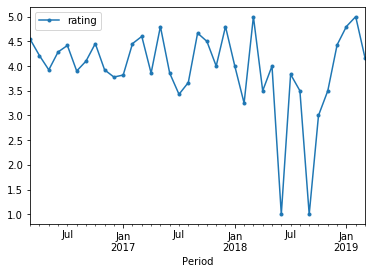

In [56]:
df_month.plot(style='.-')

In [57]:
df_product [df_product["Period"]  == "2019-03"]

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period
987798,R3PY4UII9UQ665,B00DDPI5NS,Gioco,AHGUIAVB5VETMLHP32G5YWPY7WTA,max russo,2019-03-11,5,{'$numberInt': '0'},True,"Grafica e giocabilità al top, anche se le miss...",2019-03
987827,R2459S3BWBLMQN,B00DDPI5NS,Arrivato danneggiato,AH7Z7IJKN32RN5DGKW2QN2QNNUGQ,ClaudiaASLMNK,2019-03-12,1,{'$numberInt': '0'},True,Arrivato danneggiato e fatto subito il reso. I...,2019-03
987873,R1V94JUYYD8XRU,B00DDPI5NS,Ok,AGRNZCZTTEACU645GR5T73CUUWAA,Cliente Amazon,2019-03-10,4,{'$numberInt': '0'},True,Serve internet ma è un bel gioco,2019-03
987883,R2XOP48ZVVU2R4,B00DDPI5NS,Consigliato,AFEQGEBOL66CCPVAGMLZSUJA54RQ,Frank,2019-03-29,5,{'$numberInt': '0'},True,Ottimo titolo ubisoft,2019-03
987915,R2IPCE5KU84IAE,B00DDPI5NS,super,AG5N3W3WLWU4JJ3IZDFU2SUQOAUA,Lalla,2019-03-30,5,{'$numberInt': '0'},True,super,2019-03
987950,RKKUKDEM0B9LU,B00DDPI5NS,Ottimo gioco,AH4UA3O3NBMQM7REKZWRGKPWPGWQ,vladislav b.,2019-03-26,5,{'$numberInt': '0'},True,Ottimo gioco,2019-03


In [58]:
import datetime
# considero periodi di 6 mesi
def manage_date(date):
    date= str(date)
    datee = datetime.datetime.strptime(str(date), "%Y-%m")
    six=1
    if (datee.month > 6):
        six=2
    return str(datee.year)+"-"+str(six)

In [59]:
# manage_date(df_product["Period"].iloc[0])
df_product["new_period"] = df_product["Period"].apply(manage_date)
df_product

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period,new_period
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,{'$numberInt': '6'},True,Necessita di una connessione per poter giocare...,2017-12,2017-2
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,{'$numberInt': '3'},True,Impeccabile la consegna amazon. Ho giocato the...,2018-08,2018-2
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,{'$numberInt': '4'},True,"Gioco meraviglioso, unisce le componenti steal...",2018-03,2018-1
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,{'$numberInt': '3'},True,Il gioco a parer mio è molto bello e curato e ...,2017-03,2017-1
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,{'$numberInt': '2'},True,Dall' e3 pareva una vera rivoluzione degli Ope...,2017-08,2017-2
...,...,...,...,...,...,...,...,...,...,...,...,...
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,{'$numberInt': '5'},True,Spedizione ottima. La data è stata rispettata....,2016-03,2016-1
988067,R3SVO92VAFA3R1,B00DDPI5NS,Attenzione trophy hunter,AGBBYW32GLGJJZSPHL35FU5Z7SDQ,Cliente Amazon,2016-04-13,1,{'$numberInt': '1'},False,I trofei sono buggati in modo random - vedasi ...,2016-04,2016-1
988068,R23ZP7LFPVUO3R,B00DDPI5NS,Sony ps4 the division,AHZCWMIBCOWUZDXH47KY254ECRDQ,Condor,2016-12-07,2,{'$numberInt': '0'},False,"Ho giocato alla beta la grafica è ben fatta, m...",2016-12,2016-2
988069,RMVZA7JAH7NRP,B00DDPI5NS,Spettacolo,AH426TZBZFPIS7CHSFGOH577F7EQ,MDFRI,2017-12-05,5,{'$numberInt': '0'},False,"Ammetto di essere di parte, ma la saga mi è pi...",2017-12,2017-2


In [60]:
final_product_df = df_product[['new_period','rating']].groupby(['new_period']).mean()
final_product_df

,rating
new_period,
2016-1,4.359551
2016-2,4.067568
2017-1,4.173913
2017-2,4.080000
2018-1,3.538462
2018-2,3.789474
2019-1,4.538462


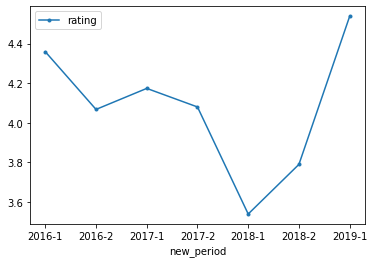

In [61]:
final_product_df.plot(style='.-')